In [2]:
import os, pandas as pd, numpy as np

In [1]:
path_to_directory = "C:\\Users\\ayas\\Downloads\\SCMA"

In [3]:
import os

In [4]:
os.chdir(path_to_directory)

In [5]:
print("Current Working Directory:", os.getcwd())

Current Working Directory: C:\Users\anjel\Downloads\SCMA


In [8]:
import pandas as pd

In [11]:
df = pd.read_csv(r"C:\Users\ayas\Downloads\SCMA\NSSO68.csv", encoding="Latin-1", low_memory=False)

In [12]:
df = pd.read_csv("C:\\Users\\ayas\\Downloads\\SCMA\\NSSO68.csv", encoding="Latin-1", low_memory=False)

In [13]:
print(df.head())

   slno       grp  Round_Centre  FSU_number  Round  Schedule_Number  Sample  \
0     1  4.10E+31             1       41000     68               10       1   
1     2  4.10E+31             1       41000     68               10       1   
2     3  4.10E+31             1       41000     68               10       1   
3     4  4.10E+31             1       41000     68               10       1   
4     5  4.10E+31             1       41000     68               10       1   

   Sector  state  State_Region  ...  pickle_v  sauce_jam_v  Othrprocessed_v  \
0       2     24           242  ...       0.0          0.0              0.0   
1       2     24           242  ...       0.0          0.0              0.0   
2       2     24           242  ...       0.0          0.0              0.0   
3       2     24           242  ...       0.0          0.0              0.0   
4       2     24           242  ...       0.0          0.0              0.0   

   Beveragestotal_v  foodtotal_v  foodtotal_q  sta

In [14]:
MH = df[df['state_1']=="MH"]

In [15]:
MH.isnull().sum().sort_values(ascending = False)

soyabean_q         8043
soyabean_v         8043
Meals_School       7953
Meals_Employer     7899
Land_Leased_out    7880
                   ... 
palak_q               0
carrot_q              0
radish_q              0
brinjal_q             0
fv_tot                0
Length: 384, dtype: int64

In [16]:
df.columns

Index(['slno', 'grp', 'Round_Centre', 'FSU_number', 'Round', 'Schedule_Number',
       'Sample', 'Sector', 'state', 'State_Region',
       ...
       'pickle_v', 'sauce_jam_v', 'Othrprocessed_v', 'Beveragestotal_v',
       'foodtotal_v', 'foodtotal_q', 'state_1', 'Region', 'fruits_df_tt_v',
       'fv_tot'],
      dtype='object', length=384)

In [17]:
MH_new = MH[['state_1', 'District', 'Sector','Region','State_Region','ricetotal_q','wheattotal_q','moong_q','Milktotal_q','chicken_q','bread_q','foodtotal_q','Beveragestotal_v','Meals_At_Home']]

In [18]:
MH_new.isnull().sum().sort_values(ascending = False)

Meals_At_Home       184
state_1               0
District              0
Sector                0
Region                0
State_Region          0
ricetotal_q           0
wheattotal_q          0
moong_q               0
Milktotal_q           0
chicken_q             0
bread_q               0
foodtotal_q           0
Beveragestotal_v      0
dtype: int64

In [19]:
MH_clean = MH_new.copy()

In [20]:
MH_clean.loc[:, 'Meals_At_Home'] = MH_clean['Meals_At_Home'].fillna(MH_new['Meals_At_Home'].mean())

In [21]:
MH_clean.isnull().any()

state_1             False
District            False
Sector              False
Region              False
State_Region        False
ricetotal_q         False
wheattotal_q        False
moong_q             False
Milktotal_q         False
chicken_q           False
bread_q             False
foodtotal_q         False
Beveragestotal_v    False
Meals_At_Home       False
dtype: bool

In [17]:
# Outlier Checking

In [3]:
import pandas as pd

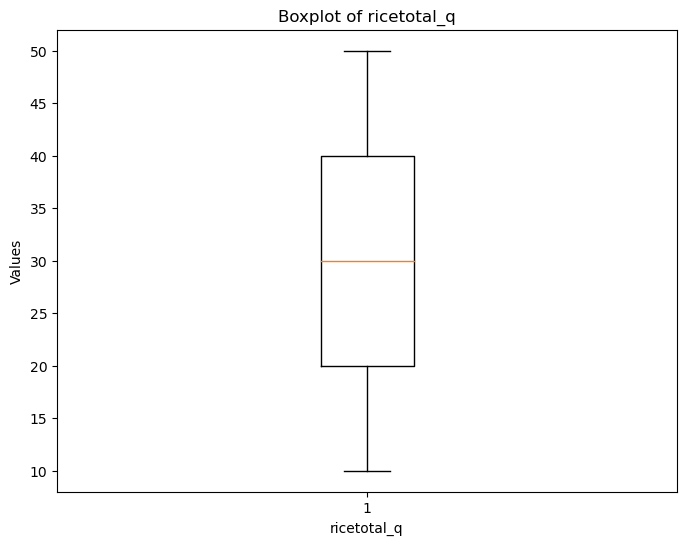

In [4]:
MH_clean = pd.DataFrame({'ricetotal_q': [10, 20, 30, 40, 50]})
plt.figure(figsize=(8, 6))
plt.boxplot(MH_clean['ricetotal_q'])
plt.xlabel('ricetotal_q')
plt.ylabel('Values')
plt.title('Boxplot of ricetotal_q')
plt.show()

In [5]:
rice1 = MH_clean['ricetotal_q'].quantile(0.25)
rice2 = MH_clean['ricetotal_q'].quantile(0.75)
iqr_rice = rice2-rice1
up_limit = rice2 + 1.5*iqr_rice
low_limit = rice1 - 1.5*iqr_rice

In [6]:
MH_clean=MH_new[(MH_new['ricetotal_q']<=up_limit)&(MH_new['ricetotal_q']>=low_limit)]

NameError: name 'MH_new' is not defined

{'whiskers': [<matplotlib.lines.Line2D at 0x21a91a17850>,
 'caps': [<matplotlib.lines.Line2D at 0x21a91a18c10>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a90bb5410>],
 'medians': [<matplotlib.lines.Line2D at 0x21a91a19e90>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a91a18650>],
 'means': []}

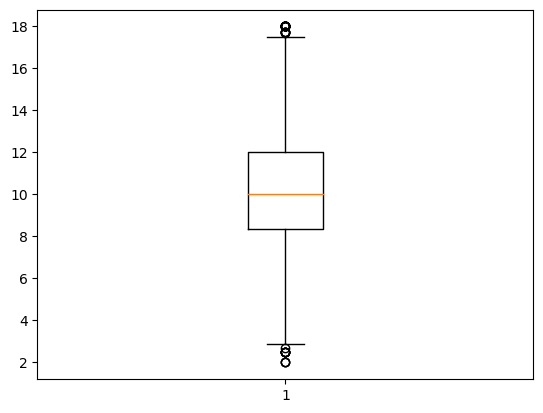

In [39]:
plt.boxplot(AP_clean['ricetotal_q'])

In [25]:
MH_clean['District'].unique()

array([21, 24, 22,  9, 13, 14, 12, 11,  7,  4,  5,  6,  8, 10, 28, 20, 27,
       18, 19, 17, 15,  2,  3,  1, 16, 25, 34, 35, 33, 31, 30, 29, 26, 32],
      dtype=int64)

In [27]:
# Replace values in the 'Sector' column
MH_clean.loc[:,'Sector'] = MH_clean['Sector'].replace([1, 2], ['URBAN', 'RURAL'])

In [27]:
#total consumption

In [28]:
MH_clean.columns

Index(['state_1', 'District', 'Sector', 'Region', 'State_Region',
       'ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q',
       'bread_q', 'foodtotal_q', 'Beveragestotal_v', 'Meals_At_Home'],
      dtype='object')

In [29]:
MH_clean.loc[:, 'total_consumption'] = MH_clean[['ricetotal_q', 'wheattotal_q', 'moong_q', 'Milktotal_q', 'chicken_q', 'bread_q', 'foodtotal_q', 'Beveragestotal_v']].sum(axis=1)

In [30]:
MH_clean.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
7577,MH,21,RURAL,1,271,3.25,5.000000,0.500000,0,0.500000,0.250000,22.900388,12.50,56.0,44.900388
7578,MH,21,RURAL,1,271,6.00,1.666667,0.333333,0,0.333333,0.333333,31.650533,25.00,60.0,65.317200
7579,MH,21,RURAL,1,271,0.00,0.000000,0.000000,0,0.000000,0.000000,0.000000,25.00,0.0,25.000000
7580,MH,21,RURAL,1,271,3.00,5.000000,0.250000,0,0.000000,0.000000,19.337788,15.00,60.0,42.587788
7581,MH,21,RURAL,1,271,2.50,5.000000,0.250000,0,0.250000,0.000000,23.300338,46.25,60.0,77.550337


In [31]:
MH_clean.groupby('Region').agg({'total_consumption':['std','mean','max','min']})

total_consumption                            
                     std       mean         max  min
Region                                              
1              54.508436  65.387214  498.594137  0.0
2              30.910619  50.397784  560.567083  0.0
3              27.290820  43.207922  295.575850  0.0
4              26.264769  45.035313  345.767750  0.0
5              25.680654  46.143296  244.700687  0.0
6              16.786203  40.608375  178.650170  0.0

In [32]:
MH_clean.groupby('District').agg({'total_consumption':['std','mean','max','min']})

total_consumption                                  
                       std       mean         max        min
District                                                    
1                13.525049  34.780813   99.383150  10.301250
2                20.381228  40.008405  138.224383   1.751100
3                32.175292  42.587370  295.575850   6.240000
4                19.684990  39.499138  177.727500  13.408180
5                24.070561  46.402107  177.950868   0.000000
6                15.364327  38.700840  118.343975  14.114650
7                17.274821  42.912575  164.151860  16.578475
8                35.070122  59.968482  170.000000  22.504165
9                32.825165  54.431552  244.700687   0.600000
10               19.893819  40.422942  178.650170   0.000000
11               14.796923  43.262319  132.985428  22.250250
12               21.382648  41.867453  157.600800  15.250000
13               12.247158  37.841033   82.450567   0.000000
14               11.909939  37.156571  133.955800  15.406370
15               25.404553  43.489244  167.300890   0.000000
16               38.018352  44.892427  345.767750   0.000000
17               26.159696  47.043210  167.576150  16.017336
18               25.231131  42.525776  256.150433   6.533333
19               25.956358  43.379649  220.351200   0.000000
20               28.397833  47.815506  221.752878   0.000000
21               54.102370  63.731042  405.417663   0.000000
22               62.691513  76.485934  498.594137   0.000000
24               36.002383  47.336097  257.376230   0.000000
25               37.082641  56.688835  288.988305   0.000000
26               22.103320  44.738191  179.305845   0.000000
27               24.057142  46.053152  172.750925   0.000000
28               24.417961  45.007330  167.526000   0.000000
29               24.443234  50.389748  148.525935  21.837908
30               26.361955  53.683294  203.100800   0.000000
31               47.190794  52.239056  560.567083   0.000000
32               25.505035  48.306135  160.050880  20.343920
33               18.794069  51.466972  118.235440   0.000000
34               14.027016  43.099665  121.490435  18.773563
35               15.329200  43.531389  134.316320   0.000000

In [33]:
total_consumption_by_districtcode=MH_clean.groupby('District')['total_consumption'].sum()

In [34]:
total_consumption_by_districtcode.sort_values(ascending=False).head(3)

District
22    60270.916241
21    46587.391958
25    34296.744910
Name: total_consumption, dtype: float64

In [35]:
MH_clean.loc[:,"District"] = MH_clean.loc[:,"District"].replace({5: "Dhule", 6: "Akola", 23: "Wardha"})

In [36]:
total_consumption_by_districtname=MH_clean.groupby('District')['total_consumption'].sum()

In [37]:
total_consumption_by_districtname.sort_values(ascending=False).head(3)

District
22    60270.916241
21    46587.391958
25    34296.744910
Name: total_consumption, dtype: float64

In [38]:
from statsmodels.stats import weightstats as stests

In [40]:
rural=MH_clean[MH_clean['Sector']=="RURAL"]
urban=MH_clean[MH_clean['Sector']=="URBAN"]

In [41]:
rural.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
7577,MH,21,RURAL,1,271,3.25,5.000000,0.500000,0,0.500000,0.250000,22.900388,12.50,56.0,44.900388
7578,MH,21,RURAL,1,271,6.00,1.666667,0.333333,0,0.333333,0.333333,31.650533,25.00,60.0,65.317200
7579,MH,21,RURAL,1,271,0.00,0.000000,0.000000,0,0.000000,0.000000,0.000000,25.00,0.0,25.000000
7580,MH,21,RURAL,1,271,3.00,5.000000,0.250000,0,0.000000,0.000000,19.337788,15.00,60.0,42.587788
7581,MH,21,RURAL,1,271,2.50,5.000000,0.250000,0,0.250000,0.000000,23.300338,46.25,60.0,77.550337


In [42]:
urban.head()

,state_1,District,Sector,Region,State_Region,ricetotal_q,wheattotal_q,moong_q,Milktotal_q,chicken_q,bread_q,foodtotal_q,Beveragestotal_v,Meals_At_Home,total_consumption
74284,MH,24,URBAN,1,271,8.000000,4.000000,0.400000,0,0.400000,0.0,23.950328,0.0080,60.0,36.758328
74285,MH,24,URBAN,1,271,8.333333,2.333333,0.666667,0,0.666667,0.0,14.816903,0.0000,60.0,26.816903
74286,MH,24,URBAN,1,271,7.500000,1.250000,0.625000,0,0.000000,0.0,13.987700,0.0000,60.0,23.362700
74287,MH,24,URBAN,1,271,6.666667,1.666667,0.333333,0,0.666667,0.0,14.936903,0.0000,60.0,24.270237
74288,MH,24,URBAN,1,271,9.600000,1.400000,0.200000,0,0.400000,0.0,25.190440,35.0024,60.0,71.792840


In [43]:
cons_rural=rural['total_consumption']
cons_urban=urban['total_consumption']

In [44]:
z_statistic, p_value = stests.ztest(cons_rural, cons_urban)
# Print the z-score and p-value
print("Z-Score:", z_statistic)
print("P-Value:", p_value)

Z-Score: 21.79026348373998
P-Value: 2.8699474516568675e-105
